In [2]:
from matplotlib import pyplot as plt
import rioxarray as rxr
from cartopy import crs as ccrs
import geopandas as gpd
import pandas as pd
from cartopy import feature as cfeature
import shapely
from shapely.plotting import plot_points


In [3]:
braided_fp = 'C:/Users/dego/OneDrive - Virginia Tech/GEOS6104/project figs/S2A_MSIL1C_20230830T171901_N0509_R012_T14TNL_20230830T221913.tif'
meandering_fp = 'C:/Users/dego/OneDrive - Virginia Tech/GEOS6104/project figs/S2A_OPER_PRD_MSIL1C_PDMC_20160130T054355_R012_V20160129T172550_20160129T172550.tif'
anastomosing_fp = 'C:/Users/dego/OneDrive - Virginia Tech/GEOS6104/project figs/S2B_MSIL1C_20171130T174659_N0206_R098_T13TFF_20171130T194240.tif'

In [4]:
crs = ccrs.Mercator()
rds = rxr.open_rasterio(braided_fp)
braided = rds.rio.reproject(crs)
rds = rxr.open_rasterio(meandering_fp)
meandering = rds.rio.reproject(crs)
rds = rxr.open_rasterio(anastomosing_fp)
anastomosing = rds.rio.reproject(crs)

In [5]:
crs_proj4 = crs.proj4_init

fpnk14 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK14/NK14_w_image.shp'
nk14 = gpd.read_file(fpnk14).to_crs(crs_proj4)
fpnk13 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK13/NK13_w_image.shp'
nk13 = gpd.read_file(fpnk13).to_crs(crs_proj4)
fpnj13 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NJ13/NJ13_w_image.shp'
nj13 = gpd.read_file(fpnj13).to_crs(crs_proj4)
fpnk15 = 'C:/Users/dego/OneDrive - Virginia Tech/RSSA/Platte_centerlines_masks/Vector_centerlines/NK15/NK15_w_image.shp'
nk15 = gpd.read_file(fpnk15).to_crs(crs_proj4)
centerlines = gpd.GeoDataFrame(pd.concat([nj13, nk13, nk14, nk15], ignore_index=True))

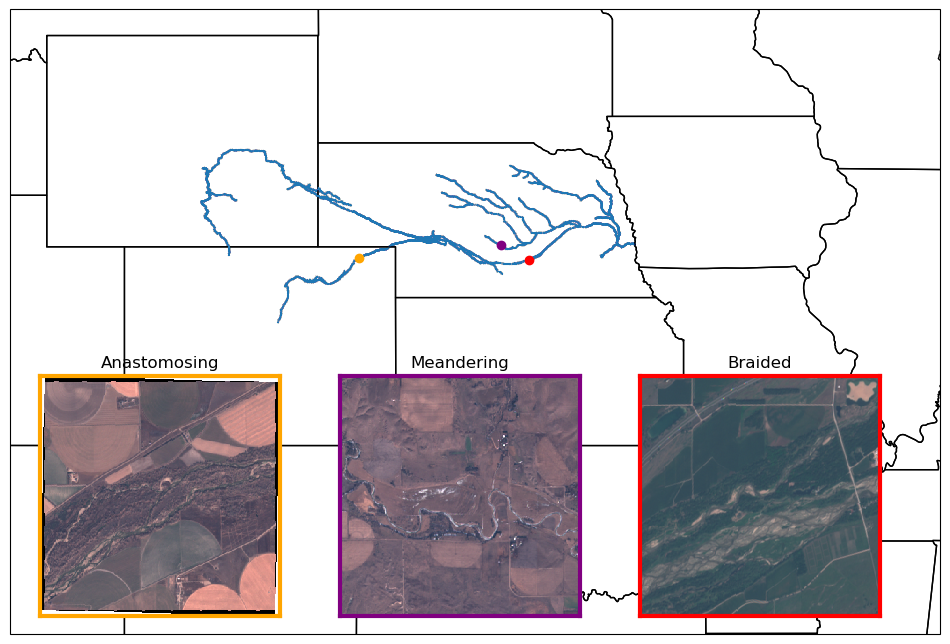

In [11]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.set_extent([-112, -88, 33, 45])
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.COASTLINE)
centerlines.plot(ax=ax)

ax_inset1 = plt.axes((0.15, 0.25, 0.20, 0.2))
anastomosing.plot.imshow(ax=ax_inset1, vmin=0, vmax=2900)
ax_inset1.set_title('Anastomosing')
ax_inset1.spines['top'].set_edgecolor('orange')
ax_inset1.spines['top'].set_linewidth(3)
ax_inset1.spines['left'].set_edgecolor('orange')
ax_inset1.spines['left'].set_linewidth(3)
ax_inset1.spines['bottom'].set_edgecolor('orange')
ax_inset1.spines['bottom'].set_linewidth(3)
ax_inset1.spines['right'].set_edgecolor('orange')
ax_inset1.spines['right'].set_linewidth(3)
ax_inset1.set_xlabel(None)
ax_inset1.set_xticks([])
ax_inset1.set_ylabel(None)
ax_inset1.set_yticks([])

ax_inset2 = fig.add_axes((0.40, 0.25, 0.20, 0.2))
meandering.plot.imshow(ax=ax_inset2, vmin=0, vmax=2900)
ax_inset2.set_title('Meandering')
ax_inset2.spines['top'].set_edgecolor('purple')
ax_inset2.spines['top'].set_linewidth(3)
ax_inset2.spines['left'].set_edgecolor('purple')
ax_inset2.spines['left'].set_linewidth(3)
ax_inset2.spines['bottom'].set_edgecolor('purple')
ax_inset2.spines['bottom'].set_linewidth(3)
ax_inset2.spines['right'].set_edgecolor('purple')
ax_inset2.spines['right'].set_linewidth(3)
ax_inset2.set_xlabel(None)
ax_inset2.set_xticks([])
ax_inset2.set_ylabel(None)
ax_inset2.set_yticks([])

ax_inset3 = fig.add_axes((0.65, 0.25, 0.20, 0.2))
braided.plot.imshow(ax=ax_inset3, vmin=0, vmax=2900)
ax_inset3.set_title('Braided')
ax_inset3.spines['top'].set_edgecolor('red')
ax_inset3.spines['top'].set_linewidth(3)
ax_inset3.spines['left'].set_edgecolor('red')
ax_inset3.spines['left'].set_linewidth(3)
ax_inset3.spines['bottom'].set_edgecolor('red')
ax_inset3.spines['bottom'].set_linewidth(3)
ax_inset3.spines['right'].set_edgecolor('red')
ax_inset3.spines['right'].set_linewidth(3)
ax_inset3.set_xlabel(None)
ax_inset3.set_xticks([])
ax_inset3.set_ylabel(None)
ax_inset3.set_yticks([])

bbox = shapely.box(*braided.rio.bounds())
bcent = shapely.centroid(bbox)
plot_points(bcent, ax=ax, color='red')

mbox = shapely.box(*meandering.rio.bounds())
mcent = shapely.centroid(mbox)
plot_points(mcent, ax=ax, color='purple', linewidth=5)

abox = shapely.box(*anastomosing.rio.bounds())
acent = shapely.centroid(abox)
plot_points(acent, ax=ax, color='orange')

In [13]:
utm14 = ccrs.epsg(32614)
mask_fp = 'C:/Users/dego/OneDrive - Virginia Tech/GEOS6104/project figs/platte_mask_img.tif'
masks = rxr.open_rasterio(mask_fp).rio.reproject(utm14)
mask_extent_fp = 'C:/Users/dego/OneDrive - Virginia Tech/GEOS6104/project figs/mask_box.shp'
mask_box = gpd.read_file(mask_extent_fp).to_crs(crs)

<GeoAxes: >

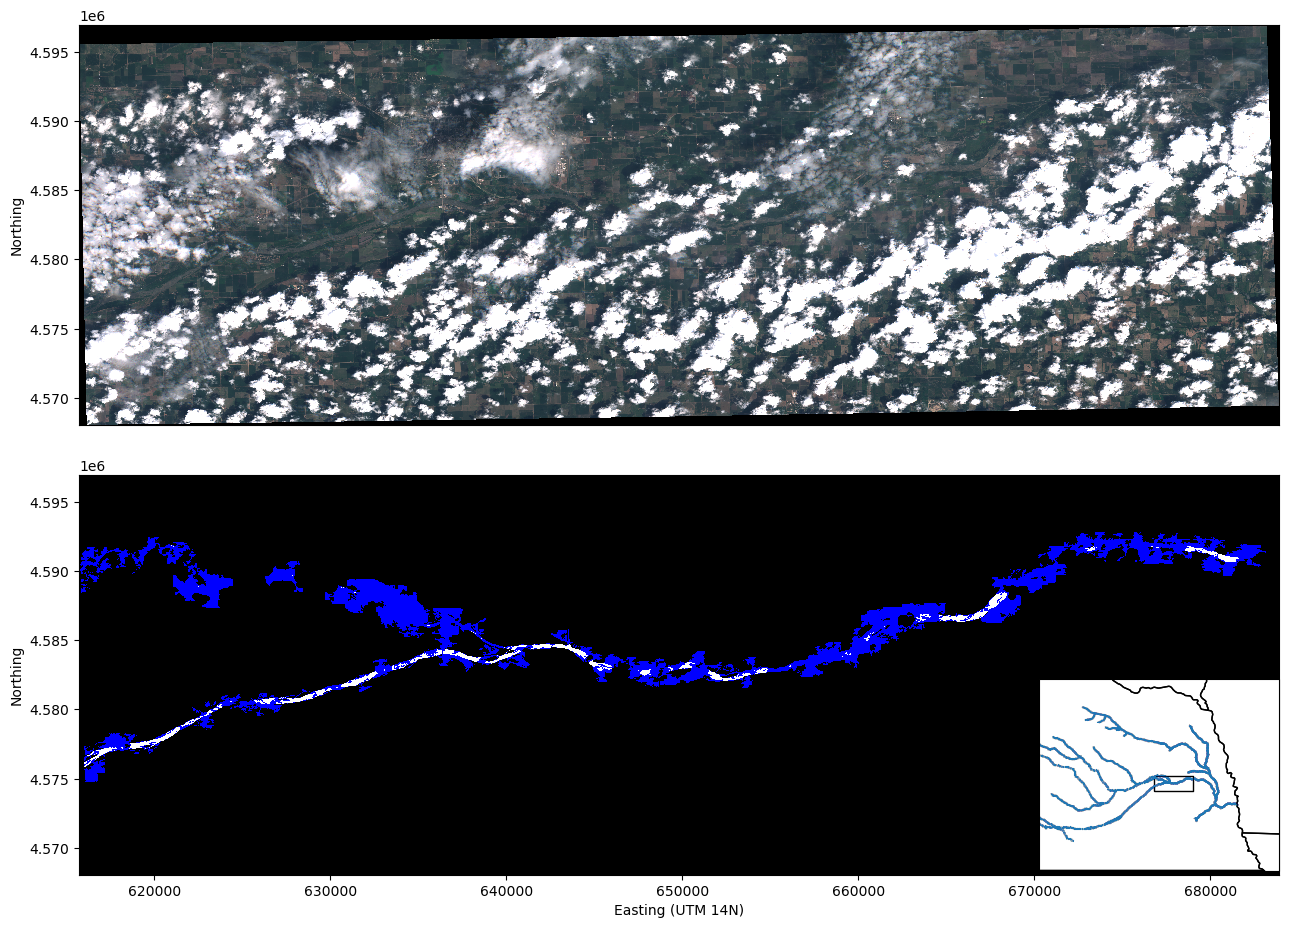

In [12]:
fig = plt.figure(figsize=(12, 10))
# main = fig.add_subplot(1, 1, 1)
ax1 = plt.axes((0, 0.45, 1, 0.4))
masks.sel(band=[3, 2, 1]).plot.imshow(ax=ax1, vmin=0, vmax=4000)
ax2 = plt.axes((0, 0, 1, 0.4))
# # masks.sel(band=[13]).plot(ax=ax2, vmin=0, vmax=3)
masks.sel(band=[11, 11, 12]).plot.imshow(ax=ax2, vmin=0, vmax=1) # red static, green static, blue dynamic

ax1.set_xticks([])
ax1.set_xlabel(None)
ax2.set_xlabel('Easting (UTM 14N)')
ax1.set_ylabel('Northing')
ax2.set_ylabel('Northing')
ax1.set_title(None)
ax2.set_title(None)
# main.set_ylabel('real northing')

tiny_inset = plt.axes((0.8, 0, 0.2, 0.2), projection=crs)
tiny_inset.set_extent([-100, -95, 40, 43])
tiny_inset.add_feature(cfeature.BORDERS)
tiny_inset.add_feature(cfeature.STATES)
mask_box.plot(ax=tiny_inset, edgecolor='black', facecolor='none')
centerlines.plot(ax=tiny_inset)